<a href="https://colab.research.google.com/github/yessss28/Estadistica/blob/main/Practica1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/yessss28/Estadistica/refs/heads/main/data.csv')
df.head()


,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


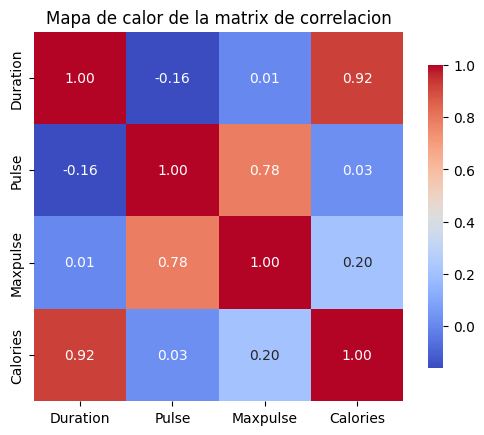

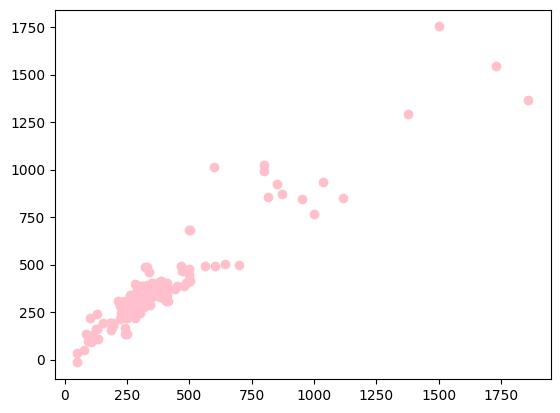

Coeficiente de correlacion: 0.8908/n 
Valor p del test de Shapiro-Wilk:  0.0000
Valor p del test de Breusch-Pagan:  0.0000


In [21]:
import pandas as pd
import numpy as np
df = pd.read_csv ('https://raw.githubusercontent.com/yessss28/Estadistica/refs/heads/main/data.csv')

#. a) revisa si el dataset tiene valores nulos mediante df.info(), en dado caso, aplica df.dropna(inplace = True).
df.info()
df.dropna(inplace=True)
#. b) Obtén un mapa de calor con la matriz de correlación. Determina las variables independientes y la variable dependiente y redacta una hipótesis.
import seaborn as sns
import matplotlib.pyplot as plt
correlation_martix = df.corr()
sns.heatmap(correlation_martix, annot=True, cmap='coolwarm',fmt='.2f',square=True,cbar_kws={'shrink':.82})
plt.title('Mapa de calor de la matrix de correlacion')
#. c) Obtén el modelo que permite relacionar las variables independientes y la variable dependiente.
X = df[['Duration','Maxpulse']]
Y = df['Calories']
import statsmodels.api as sm
X_const = sm.add_constant(X)
model = sm.OLS(y,X_const).fit()
Yc = model.predict(X_const)
plt.figure()
plt.scatter(Y,Yc, color = 'pink')
plt.show()

#. d) Obtén el coeficiente de correlación e interpreta el resultado.
from sklearn.metrics import r2_score
r2 = r2_score(Y,Yc)
print(f'Coeficiente de correlacion:{r2: 0.4}/n ')
residuales = model.resid
#. e) Verifica los supuestos mediante un gráfico "y" vs "y_pred", el test de Shapiro-Wilk y el test de Breusch-Pagan. Interpreta los resultados.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'Valor p del test de Shapiro-Wilk: {valor_p_sh: 0.4f}')
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(model.resid, model.model.exog)
print(f'Valor p del test de Breusch-Pagan: {valor_p_bp: 0.4f}')
# Se rechaza Ho
#. f) Tomando en cuenta la información obtenida, redacta una conclusión.
# Se rechaza Ho por que el valor es muy bajo


**bold text** CONCLUSION

El mapa de calor mostró una correlación moderada entre las variables independientes y la cantidad de calorías quemadas.

El modelo de regresión obtuvo un coeficiente de determinación (0,8908/n) que indica qué porcentaje de la variabilidad de las calorías quemadas es explicado por Duration y Maxpulse.
